In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Create new default settings for ALL figures

In [240]:
%%capture

# Send gridlines to back (behind the graphical elements)
plt.rc('axes', axisbelow=True)

# Set figure size
plt.rc('figure', figsize=(10, 5))

# Set gridlines and ticks
plt.rc('axes', grid=True)
plt.rc('xtick.minor', visible=True)
plt.rc('ytick.minor', visible=True)

#----------------------------------------------------
# I've yet to find a way to set and customise default MINOR and MAJOR gridlines, and so I'll assign them throughout as:    

# plt.grid(which='minor', c='lightgrey')
# plt.grid(which='major', c='grey')
#----------------------------------------------------

# Import dataset

In [241]:
df1 = pd.read_csv('datasets/uber-raw-data-aug14.csv')
df1.tail()

,Date/Time,Lat,Lon,Base
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764
829274,8/31/2014 23:59:00,40.7270,-73.9802,B02764


# Convert datatime into pandas form - !! takes a few minutes !!

In [242]:
df1['Date/Time'] = df1['Date/Time'].map(pd.to_datetime) 
df1.head()

,Date/Time,Lat,Lon,Base
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512


# Add 3 columns for day of month, weekday and hour

In [243]:
# Create day of month column
def get_dom(dt):
    return dt.day

df1['dom'] = df1['Date/Time'].map(get_dom)


# Create weekday column
def get_weekday(dt):
    return dt.weekday()

df1['weekday'] = df1['Date/Time'].map(get_weekday)


# Create hour column
def get_hour(dt):
    return dt.hour

df1['hour'] = df1['Date/Time'].map(get_hour)


df1.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,1,4,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,1,4,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,1,4,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,1,4,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,1,4,0


# Plot day of month data as histogram

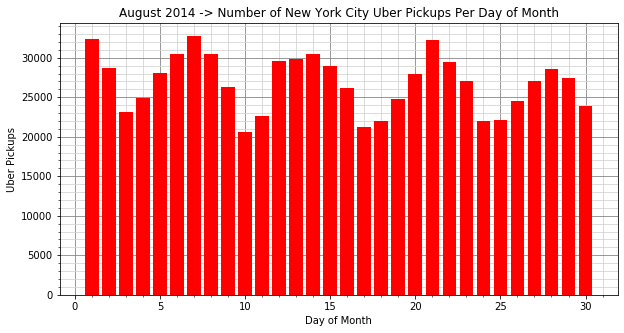

In [244]:
plt.hist(df1.dom, bins=30, rwidth=.8, range=(.5, 30.5), color='r')

plt.title('August 2014 -> Number of New York City Uber Pickups Per Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# From df1, sort day of month from least to most pickups

In [249]:
# Count number of rows
by_dom = df1.groupby('dom').apply(len)

by_dom_sorted = by_dom.sort_values()
by_dom_sorted


dom
10    20584
17    21209
18    21956
24    22036
25    22093
11    22632
3     23146
31    23271
30    23930
26    24550
19    24834
4     24952
16    26234
9     26286
27    27018
23    27097
29    27424
20    27955
5     28094
28    28597
2     28678
15    28974
22    29512
12    29646
13    29788
8     30411
14    30457
6     30495
21    32304
1     32353
7     32759
dtype: int64

# Plot data 'by_dom_sorted' as line graph

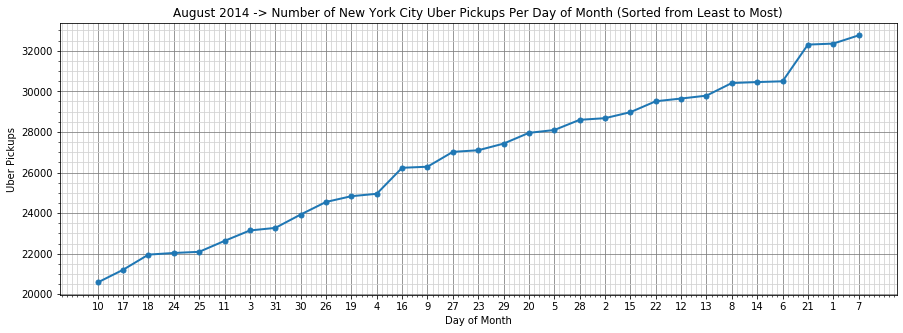

In [259]:
# Increase figure width to better view the x-axis
plt.figure(figsize=(15, 5))

plt.plot(range(0,31), by_dom_sorted, lw=2, marker='.', ms=10)
plt.xticks(range(0, 31), by_dom_sorted.index)

plt.title('August 2014 -> Number of New York City Uber Pickups Per Day of Month (Sorted from Least to Most)')
plt.xlabel('Day of Month')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Plot weekday data as histogram


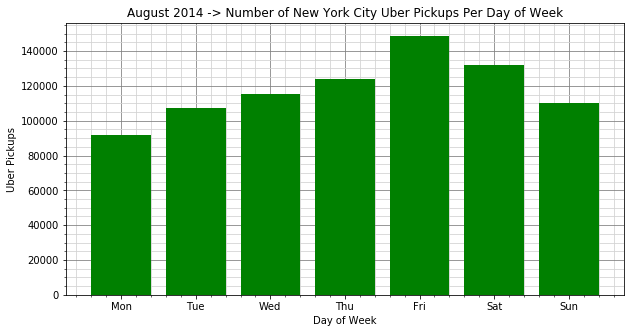

In [252]:
plt.hist(df1.weekday, bins=7, rwidth=.8, range=(-.5, 6.5), color='g')
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

plt.title('August 2014 -> Number of New York City Uber Pickups Per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Plot hour data as histogram (24hr axis => 5=5am, 20=8pm)

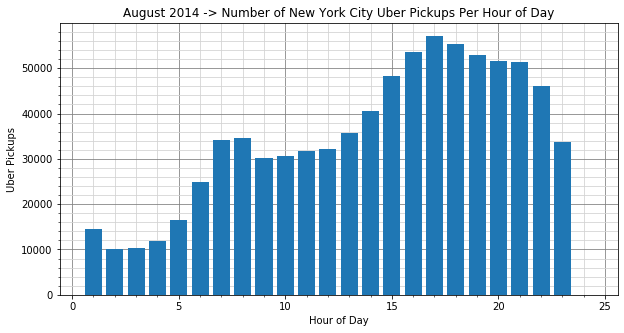

In [253]:
plt.hist(df1.hour, bins=24, rwidth=.8, range=(.5, 24.5))

plt.title('August 2014 -> Number of New York City Uber Pickups Per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Cross analysis (hour, day of week)

In [254]:
df2 = df1.groupby('weekday hour'.split()).apply(len).unstack()
df2

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,1094,684,560,1186,1836,2786,4098,5357,5060,3844,...,4572,5251,5974,6508,6135,5773,5586,4775,3559,2178
1,1115,733,508,772,1337,2270,3975,5614,5350,4196,...,5501,6361,7426,8297,7999,7273,7300,6630,4951,2903
2,1649,967,665,967,1483,2611,4546,6161,5955,4575,...,5312,6495,7682,8520,7904,7507,7736,7623,5602,3305
3,1800,1055,745,1099,1633,2497,4069,5690,5454,4536,...,5809,6936,7818,8592,8563,8512,8549,8762,8063,5736
4,3536,2064,1331,1660,2162,3101,4651,6601,6753,5512,...,7197,8803,9401,9655,9484,9227,8321,9075,9488,8056
5,5828,4209,2857,2293,1793,1801,2089,2541,3228,3863,...,6276,7478,7884,8291,8846,8521,8192,8830,9506,8166
6,6429,4759,3439,2399,1530,1459,1479,2100,2766,3669,...,5977,6873,7296,7259,6459,6195,5990,5659,4839,3265


# Plot df2 as heatmap

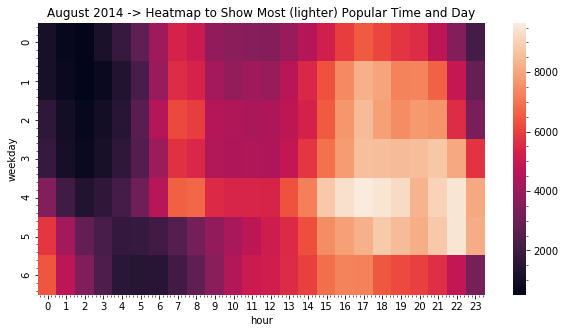

In [255]:
ax = sb.heatmap(df2)

ax.set_title("August 2014 -> Heatmap to Show Most (lighter) Popular Time and Day");

# Plot latitude and longitude data on same graph

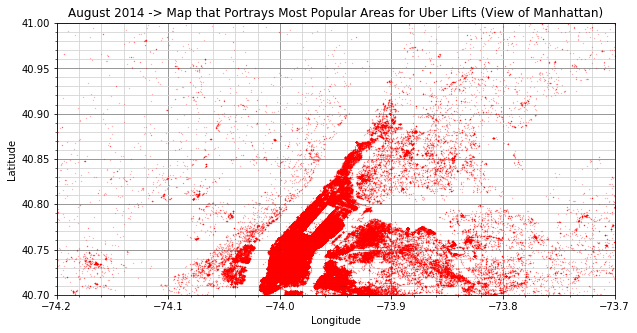

In [256]:
plt.plot(df1['Lon'], df1['Lat'], '.', ms=.5, alpha=.5, c='r')
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)

plt.title('August 2014 -> Map that Portrays Most Popular Areas for Uber Lifts (View of Manhattan)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')